## Ford GoBike Data Visualization and Analysis

### Introduction
> This project is analyzing the Ford GoBike system data from 2018-1 to 2018-10. The goal of the project is to explore some insights about the trip and user and help team make the decision about the operations and marketing strategy.
>

### Table of Content

1. [Questions](#q)
2. [Data Wrangling](#w)
3. [Data Visualization](#v)
4. [Insights and Conclusions](#i)

## 1. Questions <a name="q"></a>
1. What's the demographic of users?
2. What's the most popular station to pick up and return the bike?
3. What's the use pattern of rides.

## 2. Data Wrangling <a name="w"></a>

In [6]:
## Import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

%matplotlib inline

In [7]:
# Load the 10 csv file in the same folder.
import re

path = '/Users/amandaxiao/Desktop/Udacity/Projects/Project_5' 
files = [f for f in os.listdir(path) if re.match(r'[0-9]+.*\.csv', f)]

df=pd.DataFrame()

for file in files:
    a=pd.read_csv(file, )
    df=df.append(a)
    

In [8]:
# Reset index
bike=df.reset_index(drop=True)

In [9]:
# Check the rows and columns in the dataset.
bike.shape
print("There are {a} rows and {b} columns in the dataset".format(a=df.shape[0], b=df.shape[1]))

There are 1396765 rows and 16 columns in the dataset


In [10]:
# Check the datatype of df
bike.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [11]:
bike.isnull().sum()

duration_sec                   0
start_time                     0
end_time                       0
start_station_id            9739
start_station_name          9739
start_station_latitude         0
start_station_longitude        0
end_station_id              9739
end_station_name            9739
end_station_latitude           0
end_station_longitude          0
bike_id                        0
user_type                      0
member_birth_year          91955
member_gender              91618
bike_share_for_all_trip        0
dtype: int64

There are 150K missing value in the birth_year and gender which doesn't account for a large portion of the dataset.

In [12]:
bike.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,1.396765e+06,1.387026e+06,1.396765e+06,1.396765e+06,1.387026e+06,1.396765e+06,1.396765e+06,1.396765e+06,1.304810e+06
mean,8.825069e+02,1.169855e+02,3.776707e+01,-1.223492e+02,1.154826e+02,3.776719e+01,-1.223487e+02,2.222074e+03,1.982818e+03
std,2.516952e+03,9.791467e+01,1.052730e-01,1.770016e-01,9.795242e+01,1.051614e-01,1.766444e-01,1.214644e+03,1.047095e+01
min,6.100000e+01,3.000000e+00,3.726331e+01,-1.224737e+02,3.000000e+00,3.726331e+01,-1.224737e+02,1.100000e+01,1.881000e+03
25%,3.520000e+02,3.100000e+01,3.777106e+01,-1.224113e+02,3.000000e+01,3.777106e+01,-1.224094e+02,1.199000e+03,1.977000e+03
50%,5.590000e+02,8.700000e+01,3.778127e+01,-1.223974e+02,8.600000e+01,3.778127e+01,-1.223971e+02,2.302000e+03,1.985000e+03
75%,8.810000e+02,1.820000e+02,3.779728e+01,-1.222852e+02,1.820000e+02,3.779728e+01,-1.222880e+02,3.248000e+03,1.990000e+03
max,8.636600e+04,3.740000e+02,4.551000e+01,-7.357000e+01,3.740000e+02,4.551000e+01,-7.357000e+01,4.466000e+03,2.000000e+03


**Data Issues**
1. Bike_share_for all_trip is not very related to the analysis so I will remove it.
2. The data type of start time and end time is not correct.
3. Missing value in gender, birth_year, station_id and station name.
4. duration sec is not easy to understand so need to convert into minute.
5. There are some outliers in duration_sec and member_birth_year.
6. Birth year is not very understandable so we can transform it into age.

### Clean

In [13]:
# 1. Delete bike_share_for_all_trip column
bike.drop(['bike_share_for_all_trip'], axis=1, inplace=True)

In [14]:
# 2. change the data type of start time and end time
bike.start_time=pd.to_datetime(bike.start_time)
bike.end_time=pd.to_datetime(bike.end_time)

In [15]:
# Check new data type
bike.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
member_birth_year                 float64
member_gender                      object
dtype: object

In [16]:
# 3. Drop missing value
bike.dropna(inplace=True)

In [17]:
# Check are there any missing value
bike.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
dtype: int64

In [18]:
# 4. Change the seconds to minutes
bike['duration_mins']=bike['duration_sec']/60
bike.duration_mins=bike.duration_mins.astype(int)

In [19]:
#Delete duration_sec column
bike.drop(['duration_sec'], axis=1, inplace=True)

In [20]:
# Check the new dataset
bike.head(2)

,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,duration_mins
0,2018-02-28 23:59:47.097,2018-03-01 00:09:45.187,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,114.0,Rhode Island St at 17th St,37.764478,-122.402570,1035,Subscriber,1988.0,Male,9
1,2018-02-28 23:21:16.495,2018-02-28 23:36:59.974,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,1673,Customer,1987.0,Male,15


In [21]:
#5. Delete the value less than 1940 in member_birth_year and delete duration mins>180 mins.
bike=bike.loc[(bike['member_birth_year']>=1940)&(bike['duration_mins']<=180)]

In [22]:
# Check the new descriptive statitics.
bike.describe()

,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,duration_mins
count,1.289622e+06,1.289622e+06,1.289622e+06,1.289622e+06,1.289622e+06,1.289622e+06,1.289622e+06,1.289622e+06,1.289622e+06
mean,1.178474e+02,3.776928e+01,-1.223515e+02,1.163321e+02,3.776938e+01,-1.223510e+02,2.213780e+03,1.982884e+03,1.116066e+01
std,9.764817e+01,1.001586e-01,1.181734e-01,9.766190e+01,1.000085e-01,1.176012e-01,1.210709e+03,1.016188e+01,1.137662e+01
min,3.000000e+00,3.726331e+01,-1.224737e+02,3.000000e+00,3.726331e+01,-1.224737e+02,1.100000e+01,1.940000e+03,1.000000e+00
25%,3.400000e+01,3.777106e+01,-1.224114e+02,3.000000e+01,3.777143e+01,-1.224094e+02,1.193000e+03,1.977000e+03,5.000000e+00
50%,8.800000e+01,3.778127e+01,-1.223971e+02,8.800000e+01,3.778127e+01,-1.223959e+02,2.292000e+03,1.985000e+03,9.000000e+00
75%,1.820000e+02,3.779728e+01,-1.222856e+02,1.820000e+02,3.779728e+01,-1.222894e+02,3.240000e+03,1.990000e+03,1.300000e+01
max,3.740000e+02,3.788022e+01,-1.218333e+02,3.740000e+02,3.788022e+01,-1.218333e+02,4.466000e+03,2.000000e+03,1.800000e+02


In [23]:
#6. Conver the birth_year to Age.
bike['member_age']=2018-bike['member_birth_year']
bike.drop(['member_birth_year'], axis=1, inplace=True)

In [24]:
bike.member_age.describe()

count    1.289622e+06
mean     3.511599e+01
std      1.016188e+01
min      1.800000e+01
25%      2.800000e+01
50%      3.300000e+01
75%      4.100000e+01
max      7.800000e+01
Name: member_age, dtype: float64

In [25]:
bins=[18,35,55,75]

bike['age_group']=pd.cut(bike.member_age, bins, labels=['18~35','36~55','56~75'])

In [26]:
bike.head()

,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_gender,duration_mins,member_age,age_group
0,2018-02-28 23:59:47.097,2018-03-01 00:09:45.187,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,114.0,Rhode Island St at 17th St,37.764478,-122.402570,1035,Subscriber,Male,9,30.0,18~35
1,2018-02-28 23:21:16.495,2018-02-28 23:36:59.974,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,1673,Customer,Male,15,31.0,18~35
4,2018-02-28 23:15:12.858,2018-02-28 23:29:58.608,308.0,San Pedro Square,37.336802,-121.894090,297.0,Locust St at Grant St,37.322980,-121.887931,1839,Subscriber,Female,14,42.0,36~55
5,2018-02-28 23:14:19.170,2018-02-28 23:29:40.437,312.0,San Jose Diridon Station,37.329732,-121.901782,288.0,Mission St at 1st St,37.350964,-121.902016,2656,Customer,Male,15,21.0,18~35
6,2018-02-28 23:21:49.274,2018-02-28 23:26:27.222,316.0,San Salvador St at 1st St,37.330165,-121.885831,310.0,San Fernando St at 4th St,37.335885,-121.885660,1616,Subscriber,Female,4,61.0,56~75


## Data Visualization and Analysis <a name="v"></a>

Question 1: What's the demographic of users?

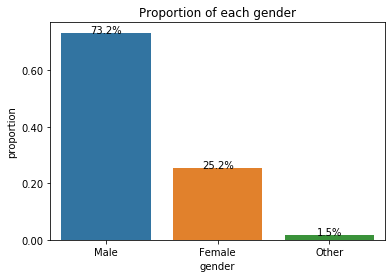

In [27]:
# User Information
n_points=bike.shape[0]
max_count=bike.member_gender.value_counts().max()
max_prop=max_count/n_points

# Generate tick mark locations and names
tick_props=np.arange(0, max_prop, 0.2)
tick_names=['{:0.2f}'.format(v) for v in tick_props]

# create plot

sns.countplot(data=bike, x='member_gender')
plt.yticks(tick_props*n_points, tick_names)
plt.ylabel('proportion')
plt.xlabel('gender')
plt.title('Proportion of each gender')


# Add annotation
gender_count=bike.member_gender.value_counts()
locs, labels=plt.xticks()

for loc, label in zip(locs, labels):
    count = gender_count[label.get_text()] 
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count, pct_string, ha = 'center', color = 'black')

74.2% of users are male and 24.3% of users are female, others only account for 1.5%. Male user accounts for the large portion of total users.

Text(0.5, 1.0, 'gender vs. user type distribution')

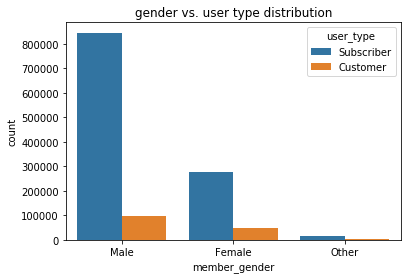

In [28]:
sns.countplot(data=bike, x='member_gender', hue='user_type')
plt.title("gender vs. user type distribution")

Here, we can conclude that the subscriber accounts for 80% of each gender, so we need to take more effort to the user experience of subscriber to improve the user retention.

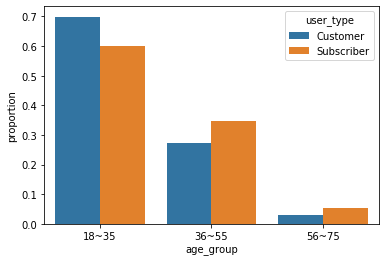

In [29]:
x, y, hue = "age_group", "proportion", "user_type"

(bike[x]
 .groupby(bike[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))

In the graph, we can see that about 70% of customers are from 18 ~ 35 age group, 28% of customers are from 36 ~ 55 age group. 60% subscribers are from 18 ~ 35 age group and about 35% of subsribers are from 36 ~ 55 age group. Thus, we can conclude that the proportion of subscriber in 36 ~ 55 age group is higher than the proportion of subscriber in 18 ~ 35 group. It could easier to convert a customer to a subscriber in 36 ~ 55 age group.

Question 2: What's the use pattern of rides?

Text(0.5, 1.0, 'Frequency of durations')

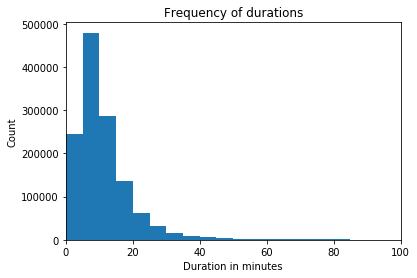

In [30]:
## 1. Check the distribution of duration minutes
bins=np.arange(0, bike.duration_mins.max()+5, 5)

plt.hist(bike.duration_mins, bins=bins)
plt.xlim(0,100)
plt.xlabel("Duration in minutes")
plt.ylabel("Count")
plt.title("Frequency of durations")

In this chart, we can see that the duration of most trips are less than 20 mins; Most of users spend 5 minutes to 10 minutes for each trip.

Text(0.5, 1.0, 'Boxplot for duration by user_type')

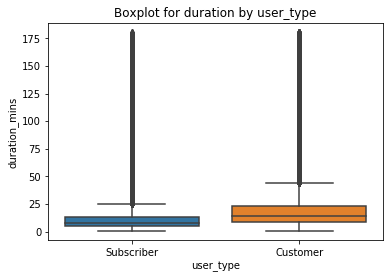

In [31]:
## Duration for different user type
sns.boxplot(data=bike, x='user_type',y='duration_mins')
plt.title("Boxplot for duration by user_type")

In [32]:
bike.groupby("user_type").duration_mins.median()

user_type
Customer      14
Subscriber     8
Name: duration_mins, dtype: int64

The median duration of customer is 14 mins which is higher than median duration of subscriber  8 mins. We can dive deep about this observation to see the reason behind, possible reason could be: customer use the bike on occasion to arrive somewhere without walking distance, whereas subscriber usually has the fixed route to go.

Text(0.5, 1.0, 'Boxplot for duration by gender')

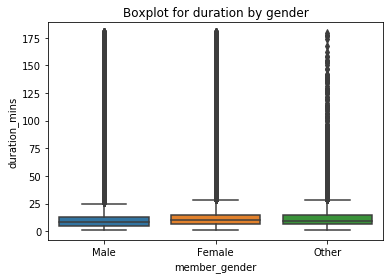

In [33]:
# Check the duration for different gender
sns.boxplot(data=bike, x='member_gender', y='duration_mins')
plt.title("Boxplot for duration by gender")

In [34]:
bike.groupby("member_gender").duration_mins.median()

member_gender
Female    10
Male       8
Other      9
Name: duration_mins, dtype: int64

In this boxplot chart, we can see the median duration for female 10 minutes is higher than median duration for male 8 mins.

Text(0.5, 1.0, 'Bar chart of duration by age group')

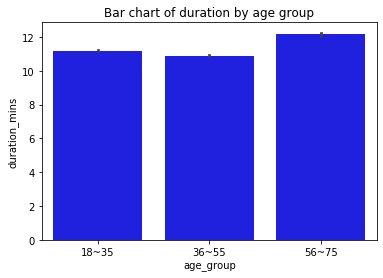

In [35]:
# Check the duration for different age group
sns.barplot(data=bike, x='age_group', y='duration_mins', color='blue')
plt.title("Bar chart of duration by age group")

In [71]:
bike.member_gender.value_counts()

Male      944456
Female    325540
Other      19626
Name: member_gender, dtype: int64

We can see that 56 ~ 75 age group has the higest duration, and then 18 ~ 35 group; 36 ~ 55 age group has the lowest average duration for each trip.

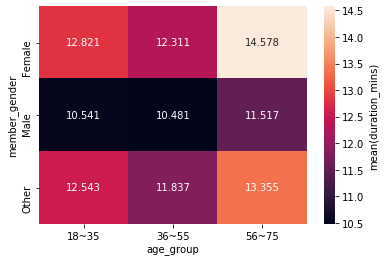

In [85]:
# Heatmap for different age_group and gender
cat_means = bike.groupby(['age_group', 'member_gender']).mean()['duration_mins']
cat_means = cat_means.reset_index(name = 'mean_duration_mins')
cat_means = cat_means.pivot(index = 'member_gender', columns = 'age_group',
                            values = 'mean_duration_mins')
sns.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(duration_mins)'})

Here, we can see that mean duration for 18 ~ 35 and 36~ 55 age group for male are almost the same, the average duaration for each trip is 10.5 minutes. The highest average duration happens in the female in 56 ~ 75 age group. On average, in the same age group, female user usually spend 2 more minutes than male user. This may result in the higher fee charged from female user than male user if we charge the fee by total time spent. Thus, I recommend that we can take both mileage and time spent into consideration to charge the fee. 

Text(0.5, 1.0, 'Start time in one day')

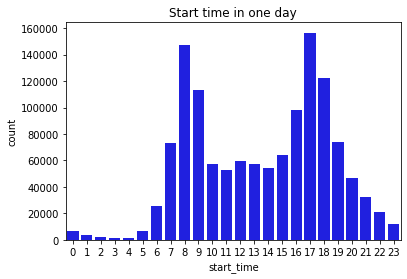

In [36]:
# Check the peak time to use the bike.
sns.countplot(bike.start_time.dt.hour, color='blue')
plt.title("Start time in one day")

Text(0.5, 1.0, 'start time frequency in Day of week')

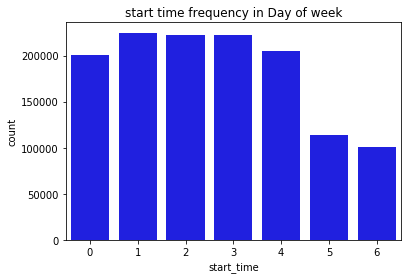

In [47]:
# Check which day that the bikes get highest usage.
sns.countplot(bike.start_time.dt.weekday, color='blue')

#labels=['sun','mon','tue','wed','thu','fri','sat']
plt.xticks(x=bike.start_time.dt.weekday)
plt.title("start time frequency in Day of week")

From this image, we can see 7:00 ~ 9:00 and 16:00 ~ 18:00 are the peak time to use bike sharing, and it aligns with the morning rush hour so I can assume most frequent use cases is to commute. The bikes get the highest usage during weekday, which is again, prove that the most frequent use case is for people to commute.

Question 3: What' the most popular station to pick up and return the bike?

In [38]:
#Visualization of start station and end station
import folium

# San Francisco latitude and longitude values
latitude = 37.77
longitude = -122.42

# Create map and display it
sf_map_1 = folium.Map(location=[latitude, longitude], zoom_start=12)
sf_map_2 = folium.Map(location=[latitude, longitude], zoom_start=12)


In [39]:
from folium.plugins import HeatMap

bike['count'] = 1
data1=bike[['start_station_latitude', 'start_station_longitude', 'count']].groupby(['start_station_latitude', 'start_station_longitude']).sum().reset_index().values.tolist()

HeatMap(data=data1, radius=6, gradient={.4:'blue',.65:"lime", 1:"red"},max_zoom=10).add_to(sf_map_1)



In [40]:
data2=bike[['end_station_latitude', 'end_station_longitude', 'count']].groupby(['end_station_latitude', 'end_station_longitude']).sum().reset_index().values.tolist()

HeatMap(data=data2, radius=6, gradient={.4:'blue',.65:"lime", 1:"red"},max_zoom=10).add_to(sf_map_2)

In [41]:
sf_map_1

In [42]:
sf_map_2

In this heatmap, we can see that the trip start station are centrated on San Francisco, Oakland and San Jose. That makes sense since the density of office buildings in these 3 area is very high. Thus, in this 3 area, we need to improve the bike inspection frequently here to make sure we provide enough amount of bikes in good quality.

### Conclusions


Given the insight we generated from the analysis, I think we can have some improvement about the marketing strategy and operations.

- In the San Francisco, Berkely, Oakland and San Jose area we can build more bike stations and put more bikes there for make sure we provide enough amount of bikes.

- Especially during weekday morning and evening, we need to make sure the enough supply for people since the most frequent use cases for user is to commute for work.

- Since male users account for a large amount of our users, we can put more marketing budget and resources focus to the male customer.

- The difference average duration between male and femal user may result in the higher fee charged from female user than male user if we charge the fee by total time spent. Thus, I recommend that we can take both mileage and time spent into consideration to charge the fee.

